<a href="https://colab.research.google.com/github/thethanh02/VNese-sentiment-analysis/blob/main/vnese_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pre_processing text**

In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 37.8 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/thethanh02/VNese-sentiment-analysis/main/test.txt
!wget https://raw.githubusercontent.com/thethanh02/VNese-sentiment-analysis/main/train.txt
!wget https://raw.githubusercontent.com/thethanh02/VNese-sentiment-analysis/main/val2.txt

--2023-04-29 10:25:24--  https://raw.githubusercontent.com/thethanh02/VNese-sentiment-analysis/main/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94338 (92K) [text/plain]
Saving to: ‘test.txt’

test.txt            100%[===================>]  92.13K  --.-KB/s    in 0.002s  

2023-04-29 10:25:26 (46.6 MB/s) - ‘test.txt’ saved [94338/94338]

--2023-04-29 10:25:26--  https://raw.githubusercontent.com/thethanh02/VNese-sentiment-analysis/main/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 533623 (521K) [text/plain]

In [ ]:
import re
from underthesea import word_tokenize, text_normalize
import string

def remove_emoji(text):
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # emoticons
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002500-\U00002BEF"  # chinese char
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # dingbats
                                u"\u3030"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def my_normalize_text(text):

    #Remove các ký tự kéo dài: vd: đẹppppppp
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)

    text = text.lower()

    #Chuẩn hóa tiếng Việt, xử lý emoj, chuẩn hóa tiếng Anh, thuật ngữ
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Chuẩn hóa 1 số sentiment words/English words
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        ' khôg ': ' không ', 'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'cute': u' dễ thương ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời',
        ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
    }
    
    for k, v in replace_list.items():
        text = text.replace(k, v)

    # chuyen punctuation thành space
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    text = text.replace(u'"', u' ')
    text = text.replace('🏻','')
    return text

In [ ]:
def txt_to_csv1(path1, path2):
    with open(path1, 'r') as file_a, open(path2, 'w') as file_b:
        file_b.write('Text,Emotion\n')
        for line in file_a:
            line = my_normalize_text(line)
            line = line.replace('\n', '')
            # loại bỏ emoji
            line = remove_emoji(line)
            # chuẩn hóa dấu câu
            line = text_normalize(line)

            words = line.strip().split()
            
            emo = words[0] + ' ' + words[1]
            text = ''
            for i in range(2, len(words)):
                text += words[i] + ' '
                if i < len(words)-1:
                    text += ' '
                
            # tách từ
            text = word_tokenize(text, format="text")
            if text != '' and emo != '':
                file_b.write(text+','+emo+'\n')

def txt_to_csv2(path1, path2):
    with open(path1, 'r') as file_a, open(path2, 'w') as file_b:
        file_b.write('Text,Emotion\n')
        for line in file_a:
            line = my_normalize_text(line)
            line = line.lower()
            # loại bỏ emoji
            line = remove_emoji(line)
            # chuẩn hóa dấu câu
            line = text_normalize(line)

            words = line.strip().split()
            
            emo = words[-2] + ' ' + words[-1]
            text = ''
            for i in range(0, len(words)-2):
                text += words[i] + ' '
                if i < len(words)-3:
                    text += ' '
            
            if emo == 'của mình':
                text += 'của mình'
                emo = 'buồn bã'
            # tách từ
            text = word_tokenize(text, format="text")
            if text != '' and emo != '':
                file_b.write(text+','+emo+'\n')

txt_to_csv1('test.txt', 'test.csv')
txt_to_csv1('train.txt', 'train.csv')
txt_to_csv2('val2.txt', 'val.csv')
# val dòng 886 không có emotion

In [ ]:
!git clone https://huggingface.co/vinai/phobert-base

Cloning into 'phobert-base'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), 2.45 MiB | 4.70 MiB/s, done.
Filtering content: 100% (3/3), 1.69 GiB | 33.03 MiB/s, done.


In [ ]:
# download ktrain
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 81.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 59.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 118.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 51.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepar

#**Train**

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv("train.csv", encoding="utf8")
test_dataset = pd.read_csv("test.csv", encoding="utf8")
valid_dataset = pd.read_csv("val.csv", encoding="utf8")

list_dataset = [train_dataset, test_dataset, valid_dataset]

dataset = pd.concat(list_dataset)

Xfeatures = dataset['Text']
ylabels = dataset['Emotion']

#  Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.1, random_state=41)

# convert pandas series to list
x_train = x_train.dropna().tolist()
x_test = x_test.dropna().tolist()
y_train = y_train.dropna().tolist()
y_test = y_test.dropna().tolist()

In [ ]:
# Create a Transformer instance
MODEL_NAME = 'vinai/phobert-base'
MAX_LEN = 256 # maximum sequence length. The longest sequence in our training set is 47.
class_names = [u'thông tin', u'buồn bã', u'phẫn nộ', u'ngạc nhiên', u'hạnh phúc', u'sợ hãi']
t = text.Transformer(MODEL_NAME, MAX_LEN, class_names=class_names)

In [ ]:
# Preprocess the Datasets
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: vi
train sequence lengths:
	mean : 13
	95percentile : 34
	99percentile : 47


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: vi
test sequence lengths:
	mean : 13
	95percentile : 34
	99percentile : 49


In [ ]:
# Create a Model and Wrap in Learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
702/702 [==============================] - 475s 645ms/step - loss: 1.7036 - accuracy: 0.2749
Epoch 2/2
702/702 [==============================] - 214s 305ms/step - loss: 11.2794 - accuracy: 0.2249


done.
Visually inspect loss plot and select learning rate associated with falling loss


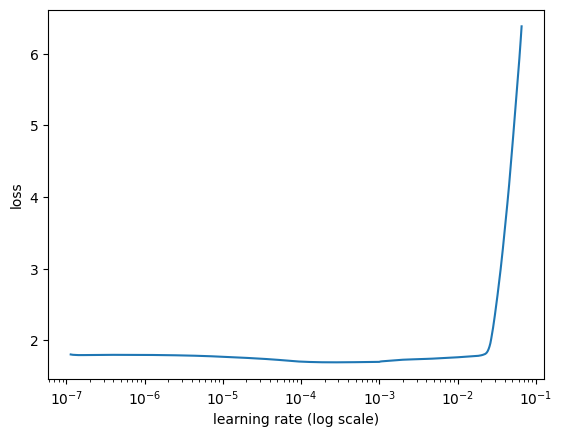

In [ ]:
# Estimate a Good Learning Rate
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
# Train Model
learner.fit_onecycle(5e-5, 8)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/8
703/703 [==============================] - 491s 670ms/step - loss: 1.2716 - accuracy: 0.5124 - val_loss: 0.9806 - val_accuracy: 0.6243
Epoch 2/8
703/703 [==============================] - 472s 671ms/step - loss: 0.8498 - accuracy: 0.6911 - val_loss: 0.7527 - val_accuracy: 0.7353
Epoch 3/8
703/703 [==============================] - 470s 668ms/step - loss: 0.6224 - accuracy: 0.7784 - val_loss: 0.7547 - val_accuracy: 0.7311
Epoch 4/8
703/703 [==============================] - 469s 667ms/step - loss: 0.4846 - accuracy: 0.8305 - val_loss: 0.8185 - val_accuracy: 0.7204
Epoch 5/8
703/703 [==============================] - 473s 673ms/step - loss: 0.3367 - accuracy: 0.8840 - val_loss: 0.7555 - val_accuracy: 0.7449
Epoch 6/8
703/703 [==============================] - 469s 668ms/step - loss: 0.1762 - accuracy: 0.9445 - val_loss: 0.8835 - val_accuracy: 0.7449
Epoch 7/8
703/703 [==============================] - 471s 670ms/ste

In [ ]:
# Evaluate/Inspect Model
learner.validate(class_names = class_names)

30/30 [==============================] - 9s 172ms/step
              precision    recall  f1-score   support

   thông tin       0.78      0.85      0.81       172
     buồn bã       0.78      0.68      0.72       287
     phẫn nộ       0.66      0.74      0.70        82
  ngạc nhiên       0.64      0.66      0.65       158
   hạnh phúc       0.83      0.91      0.87        93
      sợ hãi       0.89      0.88      0.89       145

    accuracy                           0.77       937
   macro avg       0.76      0.79      0.77       937
weighted avg       0.77      0.77      0.77       937



array([[146,  11,   4,   7,   2,   2],
       [ 23, 194,  18,  35,   9,   8],
       [  2,   8,  61,  10,   0,   1],
       [ 12,  27,   6, 105,   4,   4],
       [  3,   2,   1,   2,  85,   0],
       [  2,   8,   2,   4,   2, 127]])

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

30/30 [==============================] - 5s 162ms/step
----------
id:550 | loss:8.82 | true:thông tin | pred:hạnh phúc)



In [ ]:
# Make Predictions on New Data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict("Hôm nay trời thật đẹp")

'hạnh phúc'

# Save Model

In [ ]:
# save Predictor (i.e., model and Preprocessor instance) after partially training
predictor.save("/saved_model")

In [ ]:
!zip -r "/saved_model.zip" "/saved_model"

  adding: saved_model/ (stored 0%)
  adding: saved_model/bpe.codes (deflated 59%)
  adding: saved_model/tf_model.h5 (deflated 18%)
  adding: saved_model/tokenizer_config.json (deflated 48%)
  adding: saved_model/vocab.txt (deflated 55%)
  adding: saved_model/config.json (deflated 53%)
  adding: saved_model/tf_model.preproc (deflated 47%)
  adding: saved_model/special_tokens_map.json (deflated 57%)
  adding: saved_model/added_tokens.json (stored 0%)


In [ ]:
from google.colab import files
files.download( "/saved_model.zip" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>